In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

Using N: 1000 and D: 2
Estimated area of the unit circle: 3.048
Exact area of the unit circle: 3.141592653589793
Actual error: 0.09359265358979307
Statistical error: 9.359265358979307e-05


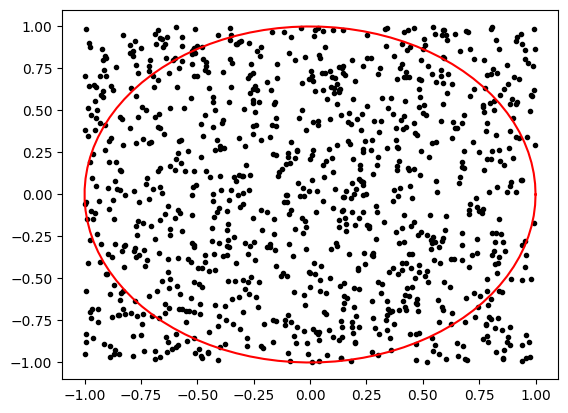

In [20]:
Niter = 1000
R = 1

# Generate Niter random vectors of length 2 and scale them to the unit square
x = 2*np.random.rand(Niter, 2)*R-R # Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

# Count how many of them are inside the unit circle
Nhint = 0
for i in range(Niter):
    if x[i,0]**2 + x[i,1]**2 < R**2:
        Nhint += 1

# Estimate the area of the unit circle
S = 4*R**2*Nhint/Niter
print('Using N:',Niter,'and D:',2)
print('Estimated area of the unit circle:',S)
print('Exact area of the unit circle:',np.pi*R**2)
print('Actual error:',abs(S-np.pi*R**2))

# Estimate the statistical error
errS = np.sqrt((S-np.pi*R**2)**2/Niter**2)
print('Statistical error:',errS)

# Plot the points
plt.plot(x[:,0], x[:,1], '.', color='black')

# Plot the circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(R*np.cos(theta), R*np.sin(theta), color='red')
plt.show()


In [93]:
# Make a log-log plot of the statistical error as a function of the number of iterations

N = 10000
R = 1

I = np.concatenate((np.arange(10, 100, 1), np.arange(100, 300, 3), np.arange(300, 600, 6), np.arange(600, 1000, 10), np.arange(1000, 1200, 12), np.arange(1200, 1500, 15), np.arange(1500, 2000, 20), np.arange(2000, 3000, 30), np.arange(3000, 5000, 50), np.arange(5000, 10000, 100), np.arange(10000, 20000, 200), np.arange(20000, 40000, 400)))
#I = np.arange(10, N, 10)
err = np.zeros(len(I))
errS = np.zeros(len(I))

for i in range(len(I)):
    Niter = I[i]
    x = 2*np.random.rand(Niter, 2)*R-R

    Nhint = 0
    for j in range(Niter):
        if x[j,0]**2 + x[j,1]**2 < R**2:
            Nhint += 1

    S = 4*R**2*Nhint/Niter
    Sth = np.pi*R**2
    err[i] = np.abs(S-Sth)
    errS[i] = np.sqrt((S-Sth)**2/Niter**2)


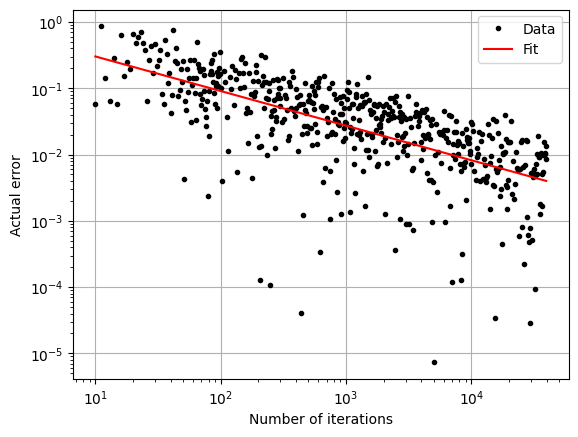

In [96]:
# Fit a power law to the data in log-log scale
p = np.polyfit(np.log(I), np.log(err), 1)

# Plot the power law fit
plt.loglog(I, err, '.', color='black', label='Data')
plt.loglog(I, np.exp(p[1])*I**p[0], color='red', label='Fit')
plt.xlabel('Number of iterations')
plt.ylabel('Actual error')
plt.legend()
plt.grid()
plt.show()

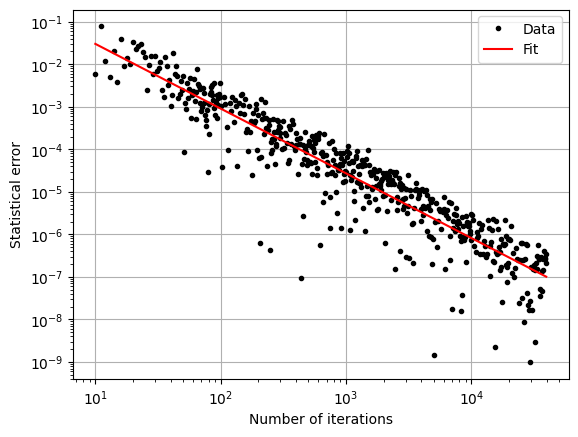

In [97]:
# Fit a power law to the data in log-log scale
p = np.polyfit(np.log(I), np.log(errS), 1)

# Plot the power law fit
plt.loglog(I, errS, '.', color='black', label='Data')
plt.loglog(I, np.exp(p[1])*I**p[0], color='red', label='Fit')
plt.xlabel('Number of iterations')
plt.ylabel('Statistical error')
plt.legend()
plt.grid()
plt.show()

Using N: 1000 and D: 7
Estimated volume of the unit sphere: 4.256
Exact volume of the unit sphere: 4.1887902047863905
Actual error: 0.0672097952136097
Statistical error: 6.72097952136097e-05


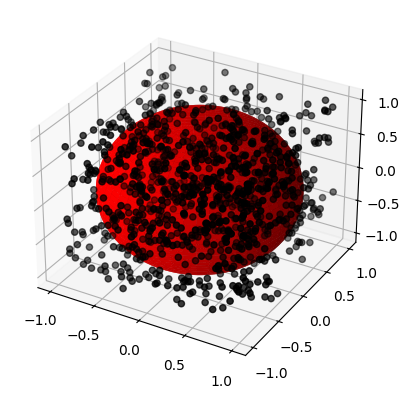

In [18]:
Niter = 1000
R = 1

# Generate Niter random vectors of length 3 and scale them to the unit cube
y = 2*np.random.rand(Niter, 3)*R-R # Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

# Count how many of them are inside the unit sphere
Nhint = 0
for i in range(Niter):
    if y[i,0]**2 + y[i,1]**2 + y[i,2]**2 < R**2:
        Nhint += 1

# Estimate the volume of the unit sphere
V = (2*R)**3*Nhint/Niter

print('Using N:',Niter,'and D:',D)
print('Estimated volume of the unit sphere:',V)
print('Exact volume of the unit sphere:',4/3*np.pi*R**3)
print('Actual error:',abs(V-4/3*np.pi*R**3))

# Estimate the statistical error
errV = np.sqrt((V-4/3*np.pi*R**3)**2/Niter**2)
print('Statistical error:',errV)

# Plot the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y[:,0], y[:,1], y[:,2],'.', color='black')

# Plot the sphere
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)
x = R*np.sin(phi)*np.cos(theta)
y = R*np.sin(phi)*np.sin(theta)
z = R*np.cos(phi)
ax.plot_surface(x, y, z, color='red')
plt.show()

In [7]:
# Make a log-log plot of the statistical error as a function of the number of iterations
N = 10000
R = 1

I = np.concatenate((np.arange(10, 100, 1), np.arange(100, 300, 3), np.arange(300, 600, 6), np.arange(600, 1000, 10), np.arange(1000, 1200, 12), np.arange(1200, 1500, 15), np.arange(1500, 2000, 20), np.arange(2000, 3000, 30), np.arange(3000, 5000, 50), np.arange(5000, 10000, 100), np.arange(10000, 20000, 200), np.arange(20000, 40000, 400)))
#I = np.arange(10, N, 10)
err = np.zeros(len(I))
errS = np.zeros(len(I))

for i in range(len(I)):
    Niter = I[i]
    y = 2*np.random.rand(Niter, 3)*R-R

    Nhint = 0
    for j in range(Niter):
        if y[j,0]**2 + y[j,1]**2 + y[j,2]**2 < R**2:
            Nhint += 1

    V = (2*R)**3*Nhint/Niter
    Vth = 4/3*np.pi*R**3
    err[i] = np.abs(V-Vth)
    errS[i] = np.sqrt((V-Vth)**2/Niter**2)

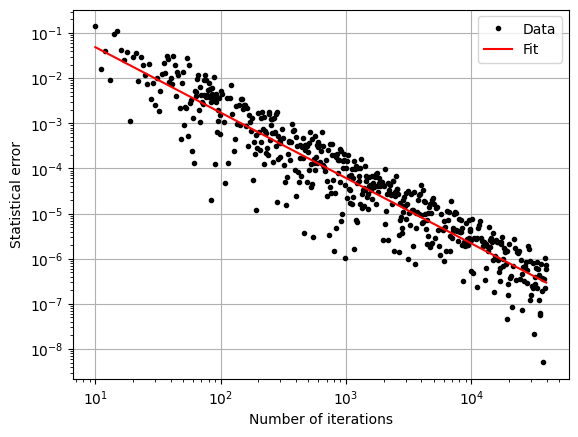

In [8]:
# Fit a power law to the data in log-log scale
p = np.polyfit(np.log(I), np.log(errS), 1)

# Plot the power law fit
plt.loglog(I, errS, '.', color='black', label='Data')
plt.loglog(I, np.exp(p[1])*I**p[0], color='red', label='Fit')
plt.xlabel('Number of iterations')
plt.ylabel('Statistical error')
plt.legend()
plt.grid()
plt.show()

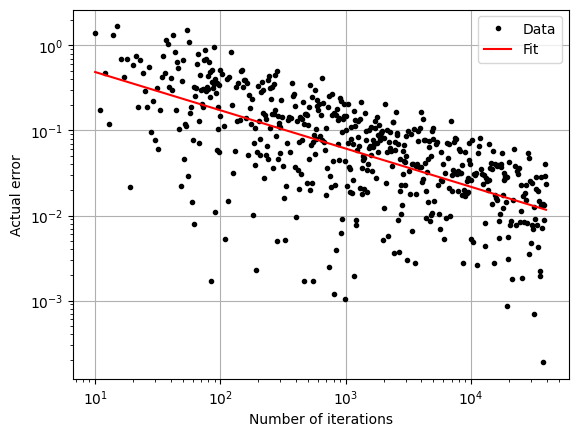

In [9]:
# Fit a power law to the data in log-log scale
p = np.polyfit(np.log(I), np.log(err), 1)

# Plot the power law fit
plt.loglog(I, err, '.', color='black', label='Data')
plt.loglog(I, np.exp(p[1])*I**p[0], color='red', label='Fit')
plt.xlabel('Number of iterations')
plt.ylabel('Actual error')
plt.legend()
plt.grid()
plt.show()

# Volume of a sphere in D dimensions

In [17]:
Niter = 10000
R = 1
D = 7

# Generate Niter random vectors of length D
z = np.random.rand(Niter, D) # Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

# Count how many of them are inside the unit hypersphere
Nhint = 0
for i in range(Niter):
    if np.sum(z[i,:]**2) < 1:
        Nhint += 1

# Estimate the volume of the unit hypershpere
V = (2*R)**D*Nhint/Niter

print('Using N:',Niter,'and D:',D)
print('Estimated volume of the unit hypersphere:',V)
print('Exact volume of the unit hypershpere:',np.pi**(D/2)/math.gamma(D/2+1)*R**D)
print('Actual error:',abs(V-np.pi**(D/2)/math.gamma(D/2+1)*R**D))

# Estimate the statistical error
errV = np.sqrt((V-np.pi**(D/2)/math.gamma(D/2+1)*R**D)**2/Niter**2)
print('Statistical error:',errV)

Using N: 10000 and D: 7
Estimated volume of the unit hypersphere: 5.0304
Exact volume of the unit hypershpere: 4.7247659703314016
Actual error: 0.30563402966859865
Statistical error: 3.0563402966859864e-05


In [21]:
# Make a log-log plot of the statistical error as a function of the number of iterations
# N = 10000
R = 1
D = 7

I = np.concatenate((np.arange(10, 100, 1), np.arange(100, 300, 3), np.arange(300, 600, 6), np.arange(600, 1000, 10), np.arange(1000, 1200, 12), np.arange(1200, 1500, 15), np.arange(1500, 2000, 20), np.arange(2000, 3000, 30), np.arange(3000, 5000, 50), np.arange(5000, 10000, 100), np.arange(10000, 20000, 200), np.arange(20000, 40000, 400)))
#I = np.arange(10, N, 10)
err = np.zeros(len(I))
errS = np.zeros(len(I))

for i in range(len(I)):
    Niter = I[i]
    z = np.random.rand(Niter, D)

    Nhint = 0
    for j in range(Niter):
        if np.sum(z[j,:]**2) < 1:
            Nhint += 1

    V = (2*R)**D*Nhint/Niter
    Vth = np.pi**(D/2)/math.gamma(D/2+1)*R**D
    err[i] = np.abs(V-Vth)
    errS[i] = np.sqrt((V-Vth)**2/Niter**2)

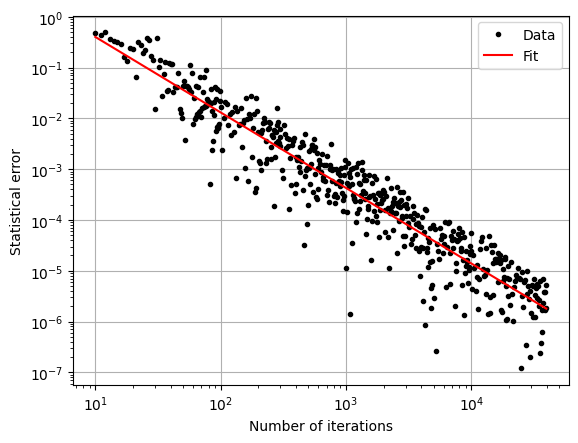

In [22]:
# Fit a power law to the data in log-log scale
p = np.polyfit(np.log(I), np.log(errS), 1)

# Plot the power law fit
plt.loglog(I, errS, '.', color='black', label='Data')
plt.loglog(I, np.exp(p[1])*I**p[0], color='red', label='Fit')
plt.xlabel('Number of iterations')
plt.ylabel('Statistical error')
plt.legend()
plt.grid()
plt.show()

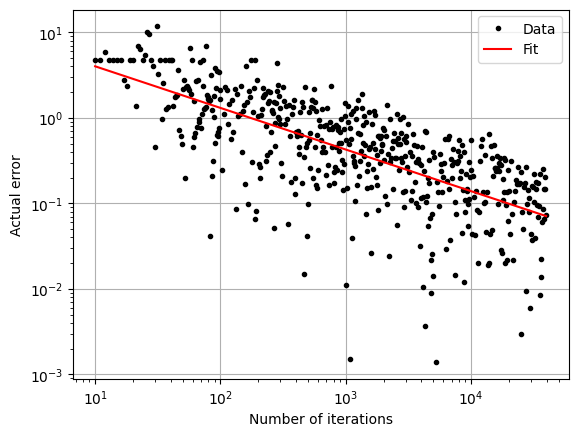

In [23]:
# Fit a power law to the data in log-log scale
p = np.polyfit(np.log(I), np.log(err), 1)

# Plot the power law fit
plt.loglog(I, err, '.', color='black', label='Data')
plt.loglog(I, np.exp(p[1])*I**p[0], color='red', label='Fit')
plt.xlabel('Number of iterations')
plt.ylabel('Actual error')
plt.legend()
plt.grid()
plt.show()

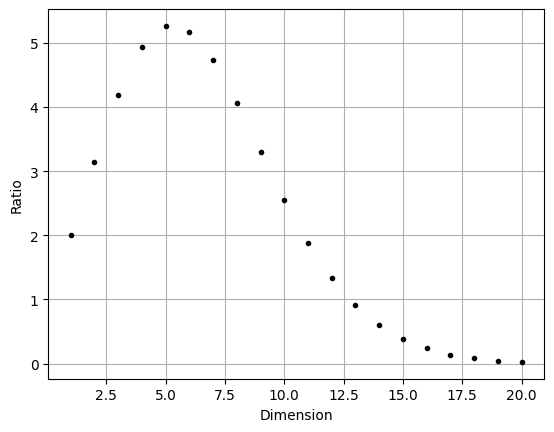

In [29]:
# Plot from D = 1 to D = 20
D = np.arange(1, 21, 1)

V = np.zeros(len(D))

for i in range(len(D)):
    V[i] = np.pi**(D[i]/2)/math.gamma(D[i]/2+1)

plt.plot(D, V, '.', color='black')
plt.xlabel('Dimension')
plt.ylabel('Ratio')
plt.grid()
plt.show()

# Volume of a sphere in $D$ dimension using importance sampling method.

$$ V_D = \frac{2 \pi^{D/2}}{D \Gamma(D/2)} R^D $$

where $R$ is the radius of the sphere, $\Gamma$ is the gamma function.

$$ V_{sphere} = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \cdots \int_{-\infty}^{\infty} \Theta(R^2 - x_1^2 - x_2^2 - \cdots - x_D^2) dx_1 dx_2 \cdots dx_D $$

where $\Theta$ is the Heaviside step function. 

In [ ]:
Niter = 10000
D = 100

